<a href="https://colab.research.google.com/github/urbnzazo25/MLDL22-23/blob/main/Lab2/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !git clone https://github.com/urbnzazo25/MLDL22-23.git

# Lab 2

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.metrics import homogeneity_completeness_v_measure, silhouette_score, v_measure_score
from sklearn.model_selection import train_test_split, cross_val_score

### Ex 1

In [24]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
random_state = [i for i in range(0, 20)]
for i, rs in enumerate(random_state):
    km = KMeans(n_clusters=3, random_state=rs)
    y_pred = km.fit_predict(X_scaled)
    h, c, v = homogeneity_completeness_v_measure(y, y_pred)
    s = silhouette_score(X_scaled, y_pred)
    print(f"{i}) rs = {rs}:")
    print(f"\tnum_iterations = {km.n_iter_}")
    print(f"\thomogeneity = {h}, completeness = {c}, v-measure = {v}")
    print(f"\tsilhouette = {s}")

0) rs = 0:
	num_iterations = 5
	homogeneity = 0.8639756867013153, completeness = 0.8643954288752762, v-measure = 0.8641855068202221
	silhouette = 0.5772435908622391
1) rs = 1:
	num_iterations = 5
	homogeneity = 0.8639756867013153, completeness = 0.8643954288752762, v-measure = 0.8641855068202221
	silhouette = 0.5772435908622391
2) rs = 2:
	num_iterations = 2
	homogeneity = 0.8639756867013153, completeness = 0.8643954288752762, v-measure = 0.8641855068202221
	silhouette = 0.5772435908622391
3) rs = 3:
	num_iterations = 5
	homogeneity = 0.8639756867013153, completeness = 0.8643954288752763, v-measure = 0.8641855068202222
	silhouette = 0.5772435908622391
4) rs = 4:
	num_iterations = 5
	homogeneity = 0.8639756867013153, completeness = 0.8643954288752762, v-measure = 0.8641855068202221
	silhouette = 0.5772435908622391
5) rs = 5:
	num_iterations = 3
	homogeneity = 0.8639756867013153, completeness = 0.8643954288752763, v-measure = 0.8641855068202222
	silhouette = 0.5772435908622391
6) rs = 6:

In [26]:
rs = 42
num_k = [i for i in range(3, 21)]
best_km_sv = KMeans()
best_km_unsv = KMeans()
best_v = 0
best_s = 0
for i, k in enumerate(num_k):
    km = KMeans(n_clusters=k, random_state=rs)
    y_pred = km.fit_predict(X_scaled)
    h, c, v = homogeneity_completeness_v_measure(y, y_pred)
    s = silhouette_score(X_scaled, y_pred)
    if i == 0:
        best_km_sv = best_km_unsv = km
        best_v = v
        best_s = s
    else:
        if v > best_v:
            best_km_sv = km
            best_v = v
        if s > best_s:
            best_km_unsv = km
            best_s = s
print(f"Best K according to v-measure:")
print(f"\tk = {best_km_sv.cluster_centers_.shape[0]}, num_iterations = {best_km_sv.n_iter_}")
print(f"\tv-measure = {best_v}\n")
print(f"Best K according to silhouette:")
print(f"\tk = {best_km_unsv.cluster_centers_.shape[0]}, num_iterations = {best_km_unsv.n_iter_}")
print(f"\tsilhouette = {best_s}\n")

Best K according to v-measure:
	k = 3, num_iterations = 4
	v-measure = 0.8641855068202221

Best K according to silhouette:
	k = 3, num_iterations = 4
	silhouette = 0.5772435908622391



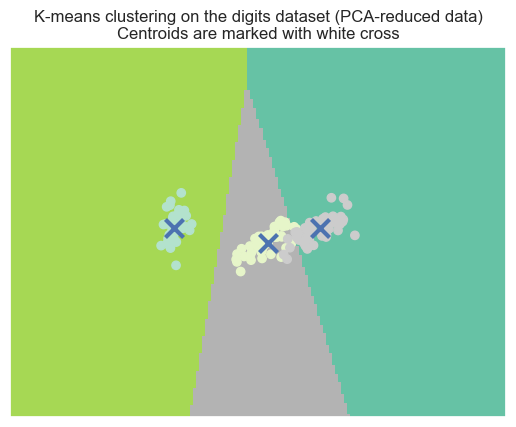

In [28]:
reduced_data = PCA(n_components=2).fit_transform(X_scaled)
km = KMeans(n_clusters=3, random_state=rs)
km.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

sns.set()
plt.figure(1)
plt.clf()
plt.imshow(
   Z,
   interpolation="nearest",
   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
   cmap='Set2',
   aspect="auto",
   origin="lower",
)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=iris.target, cmap='Pastel2')
# Plot the centroids as a white X
centroids = km.cluster_centers_
plt.scatter(
   centroids[:, 0],
   centroids[:, 1],
   marker="x",
   s=169,
   linewidths=3,
   zorder=10,
)
plt.title(
   "K-means clustering on the digits dataset (PCA-reduced data)\n"
   "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()